<a href="https://colab.research.google.com/github/fatemehghassemi/Deeplearning/blob/main/ex1_2_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation



In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
len(np.unique(train_labels))

10

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

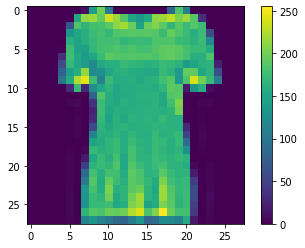

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

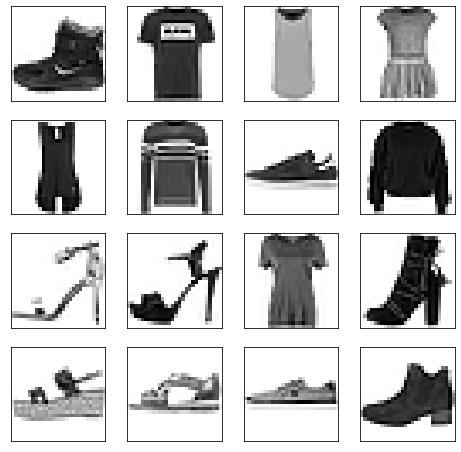

In [10]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [11]:
x_train = np.array(train_images)
x_test = np.array(test_images)


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
y_train = keras.utils.to_categorical(train_labels, num_classes=10)
y_test = keras.utils.to_categorical(test_labels, num_classes=10)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 10.3655 - accuracy: 0.2040 - val_loss: 10.4539 - val_accuracy: 0.2155
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 10.5312 - accuracy: 0.2157 - val_loss: 10.4929 - val_accuracy: 0.2128
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 10.5819 - accuracy: 0.2145 - val_loss: 10.4929 - val_accuracy: 0.2128
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 10.5819 - accuracy: 0.2145 - val_loss: 10.4929 - val_accuracy: 0.2128
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 10.5819 - accuracy: 0.2145 - val_loss: 10.4929 - val_accuracy: 0.2128
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 10.5819 - accuracy: 0.2145 - val_loss: 10.4929 - val_accuracy: 0.2128
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 10.5819 - accuracy: 0.2145 - val_loss: 10.4929 - val_accuracy:

In [18]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 10.5848 - accuracy: 0.2091

Testing loss: 10.58, acc: 0.21%


In [19]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [20]:
(x_train, y_train), (x_test, y_test) = load_data()

In [21]:
# randomly sort X_test/y_test
indexes = np.arange(x_test.shape[0])
for _ in range(5):
  indexes = np.random.permutation(indexes)  # shuffle 5 times!
x_test = x_test[indexes]
y_test = y_test[indexes]

In [22]:
  x_val = x_test[:8000]
  y_val = y_test[:8000]
  x_test = x_test[8000:]
  y_test = y_test[8000:]

In [23]:
test_images, test_labels = x_test.copy(), y_test.copy()

In [24]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], x_val.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [27]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# these are my helper functions for Keras

from keras import layers

In [30]:
 model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28,28,1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(10, activation='softmax')
    ])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_8 (Batch (None, 13, 13, 128)      

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:

history = model.fit(x_train, y_train,  verbose=1,
          epochs=25, batch_size=32, validation_data =(x_val, y_val))

Epoch 1/25
1875/1875 [==============================] - 42s 21ms/step - loss: 0.3934 - accuracy: 0.8581 - val_loss: 0.3307 - val_accuracy: 0.8756
Epoch 2/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2459 - accuracy: 0.9103 - val_loss: 0.2882 - val_accuracy: 0.8938
Epoch 3/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1917 - accuracy: 0.9295 - val_loss: 0.2634 - val_accuracy: 0.9020
Epoch 4/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1542 - accuracy: 0.9423 - val_loss: 0.2861 - val_accuracy: 0.9031
Epoch 5/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1196 - accuracy: 0.9566 - val_loss: 0.2562 - val_accuracy: 0.9169
Epoch 6/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0963 - accuracy: 0.9643 - val_loss: 0.3000 - val_accuracy: 0.9111
Epoch 7/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0767 - accuracy: 0.9711 - val_loss: 0.2818 -